In [125]:
import numpy as np
from numpy import sin, pi, exp
# import numpy.fft as dft
import scipy.fftpack as dft
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [131]:
def lamda(i, N, h):
    return 4*(sin(pi * i / 2 / N))**2/h**2

def solver(Nx, Ny, hx, hy, fd_ft):
    sol = np.zeros((Nx, Ny)) 
    for ix in range(Nx):
        for iy in range(Ny):
            sol[ix, iy] = fd_ft[ix, iy]/(lamda(ix + 1, Nx, hx) + lamda(iy + 1, Ny, hy))
    sol = dft.idstn(sol, norm = "ortho")         
    return sol

0.005452890140807645


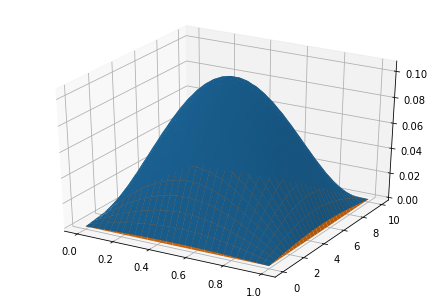

In [179]:
def f(x, y):
    return sin(pi * x /lx) * sin(pi * y/ly)

lx = 1; ly = 10
Nx = 30; Ny = 60
x = np.linspace(0, lx, Nx)
y = np.linspace(0, ly, Ny)
hx = x[1] - x[0]
hy = y[1] - y[0]
x, y = np.meshgrid(x, y)

fd = f(x, y).T
fd_ft = dft.dstn(fd, norm = "ortho")
sol_ft = solver(Nx, Ny, hx, hy, fd_ft)
sol_ft.shape
fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, sol_ft.T)
axes.plot_surface(x, y, fd.T / ((pi/lx) ** 2 + (pi/ly)**2) )
print(np.max(np.abs(sol_ft - fd / ((pi/lx) ** 2 + (pi/ly)**2))))

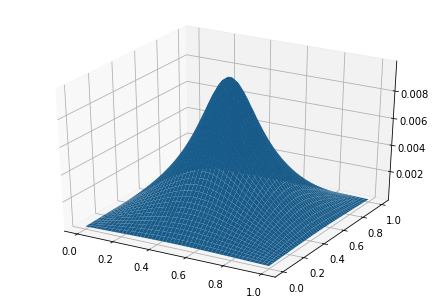

In [191]:
def f(x, y):
    return exp(-((x - lx/2)**2 + (y - ly/2)**2)/0.1**2)

lx = 1; ly = 1
Nx = 50; Ny = 50
x = np.linspace(0, lx, Nx)
y = np.linspace(0, ly, Ny)
hx = x[1] - x[0]
hy = y[1] - y[0]
x, y = np.meshgrid(x, y)

fd = f(x, y)
fd_ft = dft.dstn(fd, norm = "ortho")
fd1 = dft.idstn(fd_ft, norm = "ortho")
sol = solver(Nx, Ny, hx, hy, fd_ft)


fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, sol)
# axes.plot_surface(x, y, fd)
# axes.plot_surface(x, y, fd1)
